In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

from api_keys import weather_api_key

from citipy import citipy

output_data_file = "../output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
coords = []
cities = []

# Create a set of random latitude and longitude combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
coords = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for coord in coords:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    
    # If the city is unique, then add it to a cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [3]:
max_temp = []
humidity = []
cloudiness = []
wind = []
city_lat = []
city_long = []
country = []
date = []
city_name = []

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


In [4]:
print('Beginning Data Retrieval')
print('--------------------------------')

#loop to get information from the cities

i = 0
set_counter = 1

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        city_lat.append(response['coord']['lat'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        city_long.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f'Processing Record {i} of Set {set_counter} | {city}')
        if i == 49:
            i = 0
            set_counter += 1
        else:
            i += 1
    except(KeyError):
        print("City not found. Skipping...")
        
        
        
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
--------------------------------
City not found. Skipping...
Processing Record 0 of Set 1 | kapaa
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | dzaoudzi
Processing Record 3 of Set 1 | omsukchan
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | east london
Processing Record 6 of Set 1 | maun
Processing Record 7 of Set 1 | fortuna
Processing Record 8 of Set 1 | bilma
Processing Record 9 of Set 1 | yar-sale
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | yangambi
Processing Record 14 of Set 1 | sorland
Processing Record 15 of Set 1 | salalah
City not found. Skipping...
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | castro
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | sartell
Processing Record 20 of Set 1 | bahia blanca
Processing Record 21 of Set 1 | ca

Processing Record 36 of Set 4 | loralai
Processing Record 37 of Set 4 | muros
Processing Record 38 of Set 4 | shingu
Processing Record 39 of Set 4 | pitsunda
Processing Record 40 of Set 4 | sayyan
Processing Record 41 of Set 4 | staryy nadym
Processing Record 42 of Set 4 | thunder bay
Processing Record 43 of Set 4 | nelson bay
Processing Record 44 of Set 4 | mana
Processing Record 45 of Set 4 | sakaraha
Processing Record 46 of Set 4 | tuktoyaktuk
Processing Record 47 of Set 4 | belle fourche
Processing Record 48 of Set 4 | morondava
Processing Record 49 of Set 4 | rocha
Processing Record 0 of Set 5 | tiksi
Processing Record 1 of Set 5 | fallon
Processing Record 2 of Set 5 | thinadhoo
Processing Record 3 of Set 5 | flin flon
Processing Record 4 of Set 5 | olathe
Processing Record 5 of Set 5 | bantogon
Processing Record 6 of Set 5 | clarence town
Processing Record 7 of Set 5 | karaton
Processing Record 8 of Set 5 | dzhebariki-khaya
Processing Record 9 of Set 5 | westport
Processing Recor

Processing Record 31 of Set 8 | sechura
Processing Record 32 of Set 8 | micheweni
Processing Record 33 of Set 8 | payakumbuh
Processing Record 34 of Set 8 | tantoyuca
Processing Record 35 of Set 8 | sandwick
Processing Record 36 of Set 8 | niagara falls
Processing Record 37 of Set 8 | noumea
Processing Record 38 of Set 8 | chokurdakh
Processing Record 39 of Set 8 | beyneu
Processing Record 40 of Set 8 | erzincan
Processing Record 41 of Set 8 | wahiawa
Processing Record 42 of Set 8 | orocue
City not found. Skipping...
Processing Record 43 of Set 8 | novonikolayevskiy
Processing Record 44 of Set 8 | havre-saint-pierre
Processing Record 45 of Set 8 | nampa
Processing Record 46 of Set 8 | waimana
Processing Record 47 of Set 8 | podporozhye
Processing Record 48 of Set 8 | nikki
City not found. Skipping...
Processing Record 49 of Set 8 | carutapera
Processing Record 0 of Set 9 | sun valley
Processing Record 1 of Set 9 | saravan
Processing Record 2 of Set 9 | boffa
Processing Record 3 of Set 

Processing Record 17 of Set 12 | san juan del sur
City not found. Skipping...
Processing Record 18 of Set 12 | ferrol
Processing Record 19 of Set 12 | port hardy
Processing Record 20 of Set 12 | dunedin
Processing Record 21 of Set 12 | salekhard
Processing Record 22 of Set 12 | mezen
Processing Record 23 of Set 12 | borinskoye
Processing Record 24 of Set 12 | lola
City not found. Skipping...
Processing Record 25 of Set 12 | melville
Processing Record 26 of Set 12 | gushikawa
Processing Record 27 of Set 12 | turkistan
-----------------------------
Data Retrieval Complete
-----------------------------


In [5]:
# make a dataframe from the information

weather_df = pd.DataFrame({
    'City' : city_name,
    'Country' : country,
    'Latitude' : city_lat,
    'Longitude' : city_long,
    'Max Temperature' : max_temp,
    'Humidity' : humidity,
    'Wind Speed' : wind,
    'Cloudiness' : cloudiness,
    'Date' : date
})


In [6]:
# remove any cities with humidity greater than 100

weather_df = weather_df[weather_df['Humidity'] <= 100]
weather_df.head()

,City,Country,Latitude,Longitude,Max Temperature,Humidity,Wind Speed,Cloudiness,Date
0,Kapaa,US,22.0752,-159.3190,78.80,61,12.66,40,1618270419
1,Arraial do Cabo,BR,-22.9661,-42.0278,77.32,86,19.66,1,1618270601
2,Dzaoudzi,YT,-12.7887,45.2699,82.40,83,8.05,40,1618270601
3,Omsukchan,RU,62.5333,155.8000,-1.91,84,4.47,68,1618270601
4,Ribeira Grande,PT,38.5167,-28.7000,61.99,87,19.93,89,1618270602


# Scatterplots

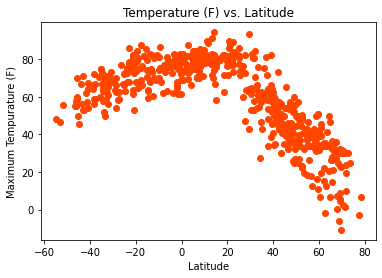

This is a comparison of maximum temperature to latitude of each city in the dataframe.
As the city gets closer to the equator (latitude is closer to zero), the temperatures to rise


In [7]:
# temp v lat
x_values = weather_df['Latitude']

y_values = weather_df['Max Temperature']

plt.scatter(x_values, y_values, color = 'orangered')
plt.xlabel('Latitude')
plt.ylabel('Maximum Tempurature (F)')
plt.title('Temperature (F) vs. Latitude')
plt.tight_layout
plt.savefig('world_temp_v_lat')
plt.show()
print('This is a comparison of maximum temperature to latitude of each city in the dataframe.')
print('As the city gets closer to the equator (latitude is closer to zero), the temperatures to rise')

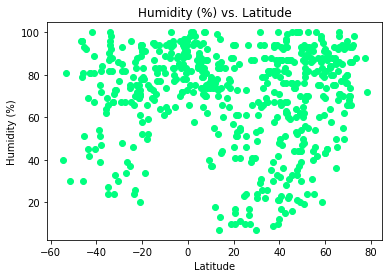

This is a comparison of average humidity to latitude of each city in the dataframe.
The cities with lower humidity are closer to the equator than some of the cities with high humidity.


In [8]:
# hum v lat

y_values = weather_df['Humidity']

plt.scatter(x_values, y_values, color = 'springgreen')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity (%) vs. Latitude')
plt.tight_layout
plt.savefig('world_hum_v_lat')
plt.show()

print('This is a comparison of average humidity to latitude of each city in the dataframe.')
print('The cities with lower humidity are closer to the equator than some of the cities with high humidity.')

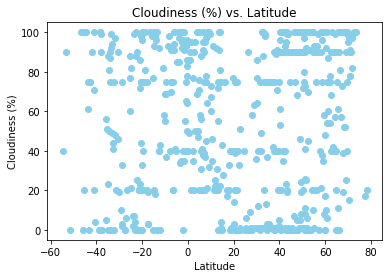

This is a comparison of average cloudiness as a percent to latitude of each city in the dataframe.
There seems to be little correlation between the two.


In [9]:
# cloudiness

y_values = weather_df['Cloudiness']

plt.scatter(x_values, y_values, color = 'skyblue')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness (%) vs. Latitude')
plt.tight_layout
plt.savefig('world_cloud_v_lat')
plt.show()

print('This is a comparison of average cloudiness as a percent to latitude of each city in the dataframe.')
print('There seems to be little correlation between the two.')

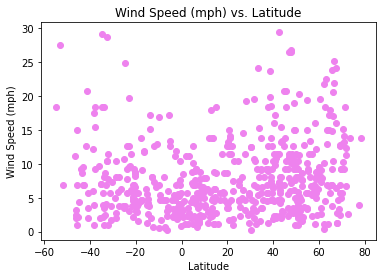

This is a comparison of average wind speed to latitude of each city in the dataframe.
There seems to be little correlation between the two.


In [10]:
# wind speed

y_values = weather_df['Wind Speed']

plt.scatter(x_values, y_values, color = 'violet')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) vs. Latitude')
plt.tight_layout
plt.savefig('world_wind_v_lat')
plt.show()

print('This is a comparison of average wind speed to latitude of each city in the dataframe.')
print('There seems to be little correlation between the two.')

In [11]:
# separate dataframe by hemispheres

north_df = weather_df[weather_df['Latitude'] >= 0]
south_df = weather_df[weather_df['Latitude'] < 0]


# Northern Hemisphere Regression

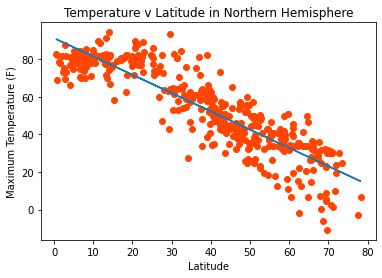

The correlation is: -0.88.
This tells us there is a strong correlation between maximum temperature and distance from the equator
in the Northern hemisphere.
As we move north away from the equator, maximum temperature decreases.


In [12]:
# temp

x_values = north_df['Latitude']

y_values = north_df['Max Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept

r = round(rvalue, 2)

plt.plot(x_values, regress_values)
plt.scatter(x_values, y_values, color = 'orangered')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.title('Temperature v Latitude in Northern Hemisphere')
plt.tight_layout
plt.savefig('north_temp_v_lat')
plt.show()

print(f'The correlation is: {r}.')
print('This tells us there is a strong correlation between maximum temperature and distance from the equator')
print('in the Northern hemisphere.')
print('As we move north away from the equator, maximum temperature decreases.')

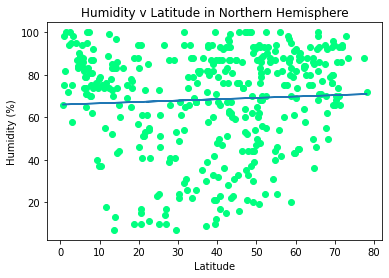

The correlation is: 0.05.
This tells us there is little relationship between humidity and distance from the equator
in the Northern hemisphere.


In [13]:
# humidity

y_values = north_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept

r = round(rvalue, 2)

plt.plot(x_values, regress_values)

plt.scatter(x_values, y_values, color = 'springgreen')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity v Latitude in Northern Hemisphere')
plt.tight_layout
plt.savefig('north_hum_v_lat')
plt.show()

print(f"The correlation is: {r}.")
print('This tells us there is little relationship between humidity and distance from the equator')
print('in the Northern hemisphere.')

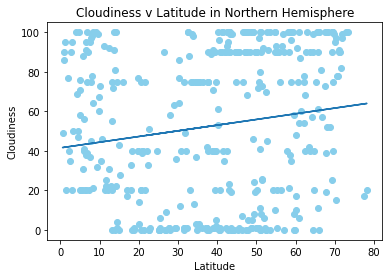

The correlation is: 0.16.
This tells us there is little correlation between cloudiness and distance from the equator
in the Northern hemisphere.


In [14]:
# cloudiness

y_values = north_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept

r = round(rvalue, 2)

plt.plot(x_values, regress_values)

plt.scatter(x_values, y_values, color = 'skyblue')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness v Latitude in Northern Hemisphere')
plt.tight_layout
plt.savefig('north_cloud_v_lat')
plt.show()

print(f'The correlation is: {r}.')
print('This tells us there is little correlation between cloudiness and distance from the equator')
print('in the Northern hemisphere.')

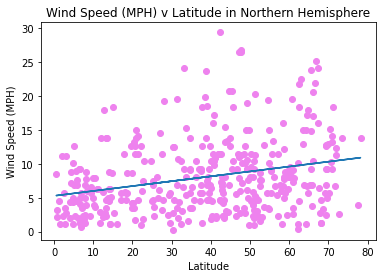

The correlation is: 0.27
This tells us there is little correlation between wind speed and distance from the equator
in the Northern hemisphere.


In [15]:
# wind speed

y_values = north_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept

r = round(rvalue, 2)

plt.plot(x_values, regress_values)

plt.scatter(x_values, y_values, color = 'violet')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title('Wind Speed (MPH) v Latitude in Northern Hemisphere')
plt.tight_layout
plt.savefig('north_wind_v_lat')
plt.show()

print(f'The correlation is: {r}')
print('This tells us there is little correlation between wind speed and distance from the equator')
print('in the Northern hemisphere.')

# Southern Hemisphere Regression

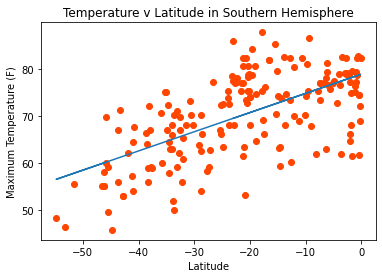

The correlation is: 0.63.
This tells us there is a moderate correlation between maximum temperature and distance from the equator
in the Southern hemisphere
The farther we move from the equator, the lower the maximum temperature.


In [16]:
# temp

x_values = south_df['Latitude']

y_values = south_df['Max Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept

r = round(rvalue, 2)

plt.plot(x_values, regress_values)

plt.scatter(x_values, y_values, color = 'orangered')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.title('Temperature v Latitude in Southern Hemisphere')
plt.tight_layout
plt.savefig('south_temp_v_lat')
plt.show()

print(f'The correlation is: {r}.')
print('This tells us there is a moderate correlation between maximum temperature and distance from the equator')
print('in the Southern hemisphere')
print('The farther we move from the equator, the lower the maximum temperature.')

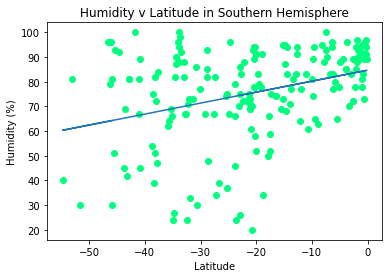

The correlation is 0.33.
This tells us that there is little correlation between humidity and distance from the equator 
in the Southern hemisphere.


In [17]:
# humidity

y_values = south_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept

r = round(rvalue, 2)

plt.plot(x_values, regress_values)

plt.scatter(x_values, y_values, color = 'springgreen')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity v Latitude in Southern Hemisphere')
plt.tight_layout
plt.savefig('south_hum_v_lat')
plt.show()

print(f'The correlation is {r}.')
print('This tells us that there is little correlation between humidity and distance from the equator ')
print('in the Southern hemisphere.')

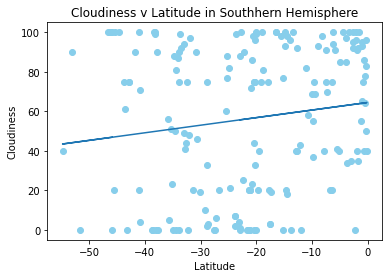

The correlation is: 0.15
There is a weak correlation between cloudiness and distance from the equator
in the Southern hemisphere.
As we move closer to the equator, cloudiness may increase.


In [18]:
# cloudiness

y_values = south_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept

r = round(rvalue, 2)

plt.plot(x_values, regress_values)

plt.scatter(x_values, y_values, color = 'skyblue')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness v Latitude in Southhern Hemisphere')
plt.tight_layout
plt.savefig('south_cloud_v_lat')
plt.show()

print(f'The correlation is: {r}')
print('There is a weak correlation between cloudiness and distance from the equator')
print('in the Southern hemisphere.')
print('As we move closer to the equator, cloudiness may increase.')

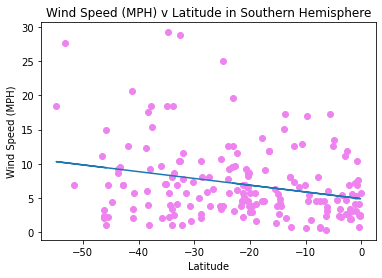

The correlation is: -0.26
There is very little correlation between wind speed and distance from the equator
in the Southern hemisphere.


In [19]:
# wind speed

y_values = south_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept

r = round(rvalue, 2)

plt.plot(x_values, regress_values)

plt.scatter(x_values, y_values, color = 'violet')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title('Wind Speed (MPH) v Latitude in Southern Hemisphere')
plt.tight_layout
plt.savefig('south_wind_v_lat')
plt.show()

print(f'The correlation is: {r}')
print('There is very little correlation between wind speed and distance from the equator')
print('in the Southern hemisphere.')

In [20]:
weather_df.to_csv(output_data_file, index = False)